In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_excel("ENB2012_data.xlsx")

In [5]:
print(df.head())

     X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28


In [9]:
print(df.columns)

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Y1', 'Y2'], dtype='object')


In [11]:
X = df.iloc[:, 0:8]
# Target = Heating Load (y1)
y = df.iloc[:, 8]

In [12]:
print("Shape of X: ", X.shape)

Shape of X:  (768, 8)


In [13]:
print("Shape of y: ",y.shape)

Shape of y:  (768,)


In [14]:
print("First few y values:", y.head())

First few y values: 0    15.55
1    15.55
2    15.55
3    15.55
4    20.84
Name: Y1, dtype: float64


In [15]:
from sklearn.linear_model import Ridge

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
ridge = Ridge(alpha=10)   # alpha is our λ regularization strength
ridge.fit(X_train, y_train)

Ridge(alpha=10)

In [21]:
y_pred = ridge.predict(X_test)

In [25]:
print("First 8 Predictions:", y_pred[:10])
print("First 8 Actual values:", y_test[:10].values)

First 8 Predictions: [18.30155706 13.43956591 30.88928569 34.12768419 15.86508727 29.73425739
 27.37453445 28.93783558 16.26418468 29.13825327]
First 8 Actual values: [16.47 13.17 32.82 41.32 16.69 23.8  24.31 28.67 19.52 28.07]


In [26]:
from sklearn.metrics import mean_squared_error,r2_score

In [27]:
print("r2 score: ",r2_score(y_test,y_pred))

r2 score:  0.8962030168799601


In [28]:
print("mean squared error: ",mean_squared_error(y_test,y_pred))

mean squared error:  10.819009626787722


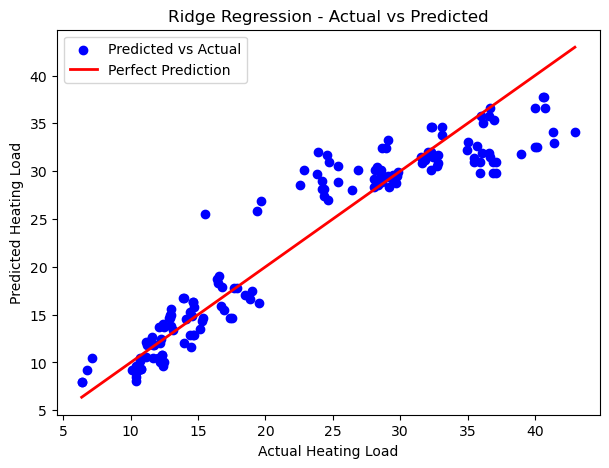

In [29]:
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred, color="blue", label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linewidth=2, label="Perfect Prediction")
plt.xlabel("Actual Heating Load")
plt.ylabel("Predicted Heating Load")
plt.title("Ridge Regression - Actual vs Predicted")
plt.legend()
plt.show()
